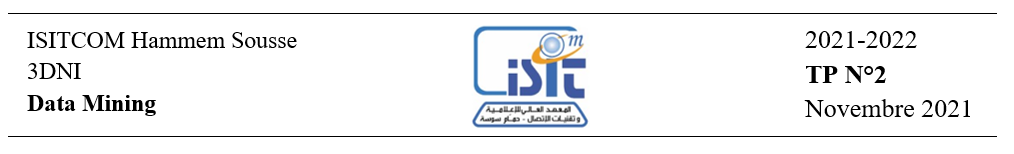

<h2>Réalisé par : Latifa Ben Amor 3DNI1</h2>

<h3>
<span style="color: #C0392B "> I. Objectif :   </span>
    </h3 

Le travail à réaliser se focalisera sur la segmentation d'une image pour produire une description interprétable.

<h3>
<span style="color: #C0392B "> II. Partie théorique :   </span>
    </h3 

<h4>
<span style="color: #1F618D ">1. Qu'est-ce que le clustering dans Data Mining?</span></h4>

Dans le clustering, un groupe d'objets de données différents est classé en tant qu'objets similaires. Un groupe signifie un cluster de données. Les ensembles de données sont divisés en différents groupes dans l'analyse de cluster, qui est basée sur la similitude des données. Après la classification des données en différents groupes, une étiquette est attribuée au groupe. Il aide à s'adapter aux changements en faisant la classification.

<h4>
<span style="color: #1F618D ">2. Exigences du clustering dans l'exploration de données
</span></h4>

 <h5>-  Interprétabilité :</h5> Le résultat du regroupement doit être utilisable, compréhensible et interprétable.
  <h5>-  Aide à gérer les données erronées :</h5> Habituellement, les données sont brouillées et non structurées. Il ne peut pas être analysé rapidement, et c'est pourquoi le regroupement d'informations est si important dans l'exploration de données. Le regroupement peut donner une certaine structure aux données en les organisant en groupes d'objets de données similaires.
   <h5>-  Haute dimension :</h5>Le clustering de données est également capable de gérer les données de grande dimension ainsi que les données de petite taille.

 <h4>
<span style="color: #1F618D ">3.  K-Means
</span></h4>

La méthode de clustering k-means est une technique d'apprentissage automatique non supervisée utilisée pour identifier des clusters d'objets de données dans un ensemble de données. Il existe de nombreux types de méthodes de clustering, mais k-means est l'une des plus anciennes et des plus accessibles.

<h4>Les applications réelles de K-Means incluent :</h4>

- profilage client

- segmentation du marché

- vision par ordinateur

- moteurs de recherche

- astronomie

<h3>
<span style="color: #C0392B "> III. Partie pratique :   </span>
    </h3 

<h3>Installation de l'"OPEN-CV"</h3>

In [3]:
!pip install opencv-python

     |████████████████████████████████| 60.3 MB 124 kB/s eta 0:00:01


<h3>Importation des bibilothéques nécessaire :</h3>

In [3]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import skimage.io
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

<h3>Clustering de l'image avec la méthode k-means :</h3>

Vu qu’on connait le principe du k-mean, on peut implémenter l’algorithme en python grâce à NumPy et Scipy par exemple. 

In [4]:
def Clustering(K):
    image= cv2.imread('fille.jpg')

    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))


    clt = KMeans(n_clusters = K)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    cv2.imwrite('tom-gerry1.jpg', quant)
    return plt.imshow(quant)

In [5]:
interact(Clustering, K=widgets.IntSlider(min=2, max=20, step=1, value=2));

interactive(children=(IntSlider(value=2, description='K', max=20, min=2), Output()), _dom_classes=('widget-int…

On peut clairement voir qu’on a 2 couleurs qui se dessinent (ceci est fait exprès, on veut faire confirmer ces cluster par k-means). 

<h3>Implémentation de quelques type de bruit sur l'image :</h3>

In [8]:
def plotnoise(mode):
    img_path="fille.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt", "pepper", "s&p", "speckle",None]);
plt.show()


<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt', 'pepper…

<h4><span style="color: #117A65 ">Random_noise :</span></h4> 

Fonction pour ajouter du bruit aléatoire de divers types à une image à virgule flottante.

<h4><span style="color: #117A65 ">mode :</span></h4> 

en sélectionnant le type de bruit à ajouter

<h4><span style="color: #117A65 "> « gaussienne » :</span></h4> 

Bruit additif à distribution gaussienne.

<h4><span style="color: #117A65 "> « localvar » : </span></h4> 

Bruit additif à distribution gaussienne avec variance locale en chaque point de l'image

<h4><span style="color: #117A65 "> « poisson » : </span></h4> 

Bruit à distribution de Poisson généré à partir des données.

<h4><span style="color: #117A65 "> « salt » :</span></h4> 

Remplace les pixels aléatoires par 1.

<h4><span style="color: #117A65 "> « pepper » : </span></h4> 

Remplace les pixels aléatoires par 0.

<h4><span style="color: #117A65 "> « s&p » : </span></h4> 

Remplace les pixels aléatoires par 0 ou 1.

<h4><span style="color: #117A65 ">« speckle »  : </span></h4> 

Bruit multiplicatif utilisant out = image + n*image, où n est un bruit uniforme avec une moyenne et une variance spécifiées.

<h3>Elimination du bruit et la segmentation des deux images (bruité et non bruité)</h3>

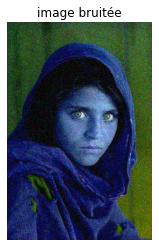

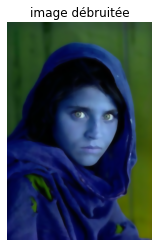

In [9]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

image_orig=cv2.imread('fille.jpg')
noisy_image = random_noise(image_orig)
show_image(noisy_image, 'image bruitée')

denoised_image = denoise_tv_chambolle(image_orig, weight=0.1, multichannel=True)
show_image(denoised_image, 'image débruitée')

<h3>
<span style="color: #C0392B "> IV. Conclusion :   </span>
    </h3>

Contrairement aux algorithmes traditionnels d'apprentissage automatique supervisé, K-Means tente de classer les données sans avoir d'abord été entraîné avec des données étiquetées. Une fois l'algorithme exécuté et les groupes définis, toute nouvelle donnée peut être facilement affectée au groupe le plus pertinent